## Nome: Felipe Tagawa Reis
## Matricula: 2037

---

## **Atividade 5** - Localização e Refinamento de Raízes

## Funções Auxiliares

In [1]:
# Plotar gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Analise de dados
import numpy as np
import pandas as pd

### Função e Derivada da Função

In [2]:
def target_function(x):
    return x**3 - 2*x**2 - 3*x + 1

def derivative_function(x):
    return 3*x**2 - 4*x - 3

intervalo = [-5, 5]

### Método de Newton-Raphson

In [3]:
# implementa o processo de iteração usando a fórmula de Newton-Raphson
def newton_raphson_method(initial_guess, tolerance, max_iterations):
    """
    Aplica o método de Newton–Raphson para aproximar uma raiz de target_function(x).

    :param initial_guess: chute inicial x0
    :param tolerance: tolerância para parada (critério |f(x)| < tolerance)
    :param max_iterations: número máximo de iterações
    :return: raiz aproximada (float), número de iterações (int)
    """
    x_n = initial_guess
    for iteration in range(max_iterations):
        f_x = target_function(x_n)
        f_prime_x = derivative_function(x_n)

        # Evitar divisão por zero
        if f_prime_x == 0:
            print("A derivada é zero. Não é possível prosseguir.")
            return x_n, iteration + 1 # Retornar a aproximação atual e a contagem de iterações

        # Verificar convergência com base na tolerância
        if abs(f_x) < tolerance:
            return x_n, iteration + 1 # Retornar a raiz e a contagem de iterações

        x_n = x_n - f_x / f_prime_x

    # Se o número máximo de iterações for atingido sem convergência
    print("Número máximo de iterações atingido sem alcançar a tolerância desejada.")
    return x_n, max_iterations

---

## Parte Prática
No Inatel, os alunos de engenharia muitas vezes precisam analisar funções matemáticas para resolver problemas práticos, como verificar o comportamento de circuitos, sinais ou sistemas de controle. Encontrar as raízes de uma função é um passo importante nesses contextos, pois pode indicar pontos de equilíbrio, frequências de ressonância ou condições de operação de um sistema.

Seja a função
$f(x) = x^3 – 2x^2 – 3x + 1$.

Sabendo que esta função possui raízes no intervalo [−5,5], utilize o TEU com espaçamento de 1 para localizar os intervalos que contêm cada uma das raízes reais da função.

In [4]:
df = pd.DataFrame(columns=["x", "f(x)", "f1(x)"])
for x in range(intervalo[0], intervalo[1]+1):
    df = pd.concat([df, pd.DataFrame({"x": [x], "f(x)": [target_function(x)], "f1(x)": [derivative_function(x)]})]).reset_index(drop=True)

print(df.to_string(index=False))

 x f(x) f1(x)
-5 -159    92
-4  -83    61
-3  -35    36
-2   -9    17
-1    1     4
 0    1    -3
 1   -3    -4
 2   -5     1
 3    1    12
 4   21    29
 5   61    52


1. Utilizando o Teorema do Valor Intermediário (TEU) e espaçamento unitário no intervalo [−5,5], determine os subintervalos que contêm cada uma das raízes reais da função.

In [8]:
def mudou_sinal(fa, fb):
    # TEU: existe raiz em [a,b] se f é contínua e fa*fb < 0
    return fa * fb < 0

intervalos = []
chutes_iniciais = []
for x in range(df.shape[0]-1):
    # 1. Verificar se há mudança de sinal na função
    fa = df["f(x)"].iloc[x]
    fb = df["f(x)"].iloc[x+1]
    xa = df["x"].iloc[x]
    xb = df["x"].iloc[x+1]
    if mudou_sinal(fa, fb):
      intervalos.append((xa,xb))
      chutes_iniciais.append((xa+xb)/2)
      continue

    # 2. Escolher os chutes iniciais para Newton-Raphson (utilize o ponto médio do intervalo)
print("Chutes iniciais (Newton-Raphson):", chutes_iniciais)

Chutes iniciais (Newton-Raphson): [-1.5, 0.5, 2.5]


2. Identifique visualmente os pontos onde a curva cruza o eixo x e compare com os intervalos obtidos pelo TEU.

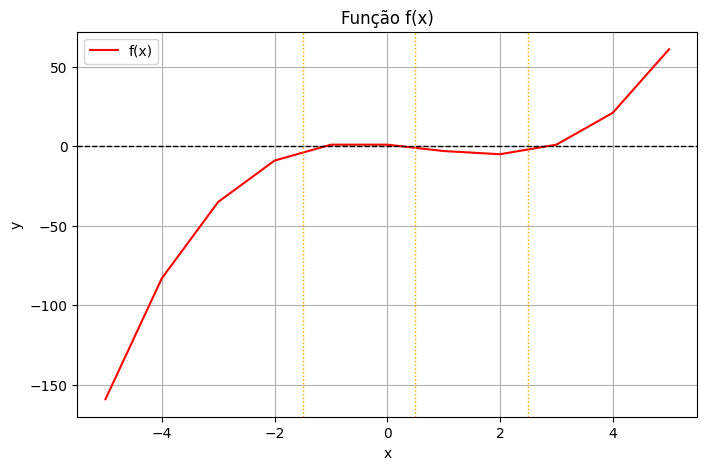

In [16]:
# Plote um gráfico de linhas que mostre a função.
plt.figure(figsize=(8,5))

# Função original
plt.plot(df["x"], df["f(x)"], label="f(x)", color="red")

# Linha do eixo x para base
plt.axhline(0, color="black", linestyle="--", linewidth=1)

# Marcar os chutes iniciais obtidos pelo TEU
for chute in chutes_iniciais:
    plt.axvline(chute, color="orange", linestyle=":", linewidth=1)

plt.legend()
plt.title("Função f(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()


3. Implemente o Método de Newton-Raphson nos pontos iniciais obtidos.

In [21]:
tolerancia = 1e-9
iteracao_max = 250

# Implementação do método consta nas funções auxiliares

chutes = [-1.5, 0.5, 2.5]
for chute in chutes:
    raiz = newton_raphson_method(chute, tolerancia, iteracao_max)
    print(f"Chute inicial {chute} → raiz encontrada: {raiz}")

Chute inicial -1.5 → raiz encontrada: (-1.1986912435638974, 5)
Chute inicial 0.5 → raiz encontrada: (0.2864620651145184, 4)
Chute inicial 2.5 → raiz encontrada: (2.912229178484397, 6)


4. Implemente o Método de Bissecção

In [22]:
def bissecao(f, a, b, tol=1e-6, max_iter=100):
    fa = f(a)
    fb = f(b)

    for i in range(max_iter):
        m = (a + b) / 2  # ponto médio
        fm = f(m)

        if abs(fm) < tol or (b - a) / 2 < tol:
            return m, i  # raiz aproximada e número de iterações

        if fa * fm < 0:
            b, fb = m, fm
        else:
            a, fa = m, fm

    return m, max_iter

print(bissecao(target_function, intervalo[0], intervalo[1], tolerancia, iteracao_max))

(-1.198691243189387, 33)


---
## Parte Teórica

1. Quais são as limitações do uso do TEU para encontrar raízes de funções?

Resposta: O TEU depende de continuidade na função no intervalo [a,b];
Não localiza a raiz, necessitando de outros métodos pra complementação;
Pode ter problemas na análise de intervalos grandes, 'escondendo' valores de raízes próximas.

2. Qual é a principal vantagem do método da bissecção em relação a outros métodos numéricos?

Resposta: É um método simples que independe de aproximações iniciais muito próximas da raiz, como é o caso do método de Newton-Raphson, sempre encontrando uma raiz dentro do intervalo escolhido (depende do TEU), mas convergindo sempre.

3. Em quais situações o método de Newton-Raphson pode falhar ou não convergir?

Resposta: Alguns casos são: escolha ruim do chute inicial (esse método funciona melhor pra pontos iniciais próximos da raiz); a derivada da função tiver descontinuidade; derivada igual a 0.